# Chapter 11. Time Series

McKinney, Wes. Python for Data Analysis (p. 478). O'Reilly Media. Kindle Edition. 


In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from datetime import datetime

In [3]:
now=datetime.now()
now

datetime.datetime(2020, 10, 6, 13, 39, 3, 9479)

In [4]:
now.year,now.day,now.month

(2020, 6, 10)

In [5]:
delta=now-datetime(2000,5,14)
delta

datetime.timedelta(days=7450, seconds=49143, microseconds=9479)

In [6]:
delta.days,delta.seconds

(7450, 49143)

In [7]:
from datetime import timedelta
start=datetime(2011,1,7)
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start+3*timedelta(12)

datetime.datetime(2011, 2, 12, 0, 0)

In [9]:
str(datetime(2011,7,1))

'2011-07-01 00:00:00'

In [10]:
dt1=datetime(2011,7,1)
dt1.strftime('%Y-%m-%d')

'2011-07-01'

In [11]:
value='2011-03-12'
datetime.strptime(value,'%Y-%m-%d')


datetime.datetime(2011, 3, 12, 0, 0)

In [12]:
datestrs = ['7/6/2011', '8/6/2011']

[datetime.strptime(i,'%d/%m/%Y') for i in datestrs]


[datetime.datetime(2011, 6, 7, 0, 0), datetime.datetime(2011, 6, 8, 0, 0)]

In [13]:
from dateutil.parser import parse

[parse(d) for d in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [14]:
parse('Jan 31, 1997 10:45 PM')


datetime.datetime(1997, 1, 31, 22, 45)

In [15]:
parse('6/12/2011')

datetime.datetime(2011, 6, 12, 0, 0)

In [16]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [17]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(datestrs)


DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [18]:
idx=pd.to_datetime(datestrs+[None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [19]:
pd.isnull(idx)

array([False, False,  True])

In [20]:
pd.isna(idx)

array([False, False,  True])

# 11.2 Time Series Basics

In [21]:
from datetime import datetime
dates = [datetime( 2011, 1, 2), 
         datetime( 2011, 1, 5),
         datetime( 2011, 1, 7), 
         datetime( 2011, 1, 8), 
         datetime( 2011, 1, 10), 
         datetime( 2011, 1, 12)]

ts=pd.Series(np.random.randn(6),index=dates)
ts


2011-01-02    1.050000
2011-01-05    1.277046
2011-01-07   -0.294343
2011-01-08   -0.324696
2011-01-10    2.376627
2011-01-12   -0.182312
dtype: float64

In [22]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [23]:
ts+ts[::2]

2011-01-02    2.100001
2011-01-05         NaN
2011-01-07   -0.588686
2011-01-08         NaN
2011-01-10    4.753254
2011-01-12         NaN
dtype: float64

In [24]:
ts.index.dtype

dtype('<M8[ns]')

In [25]:
ts.index[0]

Timestamp('2011-01-02 00:00:00')

In [26]:
ts['2011/01/05']

1.2770457815282763

In [27]:
ts['2011/01/08']

-0.3246958587440135

In [28]:
ts['20110112']

-0.18231247258579958

In [29]:
longer_ts = pd.Series( np.random.randn(1000),index = pd.date_range('1/1/2000', periods = 1000))


In [30]:
longer_ts.head()

2000-01-01   -0.339264
2000-01-02   -1.311370
2000-01-03   -1.851323
2000-01-04   -1.758231
2000-01-05    0.364716
Freq: D, dtype: float64

In [31]:
# selecting index by year
longer_ts['2001']

2001-01-01   -0.236200
2001-01-02   -0.959412
2001-01-03   -0.191426
2001-01-04    1.177871
2001-01-05   -1.981553
                ...   
2001-12-27    0.234094
2001-12-28    0.511755
2001-12-29   -0.413539
2001-12-30    0.700423
2001-12-31    0.146551
Freq: D, Length: 365, dtype: float64

In [32]:
longer_ts['2001/07']

2001-07-01    0.066455
2001-07-02    1.431549
2001-07-03    0.612359
2001-07-04    0.418952
2001-07-05   -0.297881
2001-07-06   -0.197845
2001-07-07    0.864237
2001-07-08   -0.730289
2001-07-09   -0.383297
2001-07-10    1.062441
2001-07-11   -1.667483
2001-07-12    1.342657
2001-07-13    1.335859
2001-07-14    1.038114
2001-07-15   -0.044441
2001-07-16    1.410603
2001-07-17   -0.826469
2001-07-18   -1.371089
2001-07-19    1.040024
2001-07-20    1.603245
2001-07-21    0.277515
2001-07-22    1.158820
2001-07-23    0.612694
2001-07-24    0.835885
2001-07-25    1.797010
2001-07-26   -0.965121
2001-07-27   -1.014575
2001-07-28    0.751020
2001-07-29    1.226113
2001-07-30   -0.779500
2001-07-31    0.564846
Freq: D, dtype: float64

In [33]:
longer_ts.tail()

2002-09-22   -0.330099
2002-09-23    0.859053
2002-09-24    0.246336
2002-09-25   -1.313668
2002-09-26    0.346383
Freq: D, dtype: float64

In [34]:

ts[datetime(2011,1,7):]

2011-01-07   -0.294343
2011-01-08   -0.324696
2011-01-10    2.376627
2011-01-12   -0.182312
dtype: float64

In [35]:
ts[datetime(2011,1,6):datetime(2011,1,11)]

2011-01-07   -0.294343
2011-01-08   -0.324696
2011-01-10    2.376627
dtype: float64

In [36]:
ts.truncate(after='1/9/2011')

2011-01-02    1.050000
2011-01-05    1.277046
2011-01-07   -0.294343
2011-01-08   -0.324696
dtype: float64

In [37]:
ts

2011-01-02    1.050000
2011-01-05    1.277046
2011-01-07   -0.294343
2011-01-08   -0.324696
2011-01-10    2.376627
2011-01-12   -0.182312
dtype: float64

In [38]:
dates = pd.date_range('1/1/2000', periods = 100, freq ='W-WED')


In [39]:
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [40]:
long_df = pd.DataFrame(np.random.randn(100, 4),index = dates,columns =['Colorado','Texas','New York','Ohio'])
long_df.loc['5-2001']


,Colorado,Texas,New York,Ohio
2001-05-02,0.062894,1.704666,0.903586,-0.818868
2001-05-09,0.901651,-0.579709,-0.932254,0.607942
2001-05-16,1.405570,0.190074,-0.902009,1.646610
2001-05-23,-1.684106,-0.200554,1.250756,1.481671
2001-05-30,1.088438,-0.303343,1.034543,0.422878


# Time Series with Duplicate Indices


In [41]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [42]:
dup_ts = pd.Series(np.arange(5), index = dates)


In [43]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [44]:
dup_ts.index.is_unique

False

In [45]:
dup_ts['1/3/2000']


4

In [46]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [47]:
grouped=dup_ts.groupby(dup_ts.index)


In [48]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [49]:
def print_grps(grp_obj):
    for key,grp in grp_obj:
        print('key -->',key)
        print(grp)

In [50]:
print_grps(grouped)

key --> 2000-01-01 00:00:00
2000-01-01    0
dtype: int32
key --> 2000-01-02 00:00:00
2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32
key --> 2000-01-03 00:00:00
2000-01-03    4
dtype: int32


In [51]:
grouped=dup_ts.groupby(level=0)
print_grps(grouped)

key --> 2000-01-01 00:00:00
2000-01-01    0
dtype: int32
key --> 2000-01-02 00:00:00
2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32
key --> 2000-01-03 00:00:00
2000-01-03    4
dtype: int32


In [52]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [53]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Date Ranges, Frequencies, and Shifting


In [54]:
ts

2011-01-02    1.050000
2011-01-05    1.277046
2011-01-07   -0.294343
2011-01-08   -0.324696
2011-01-10    2.376627
2011-01-12   -0.182312
dtype: float64

In [55]:
resampler=ts.resample('D')

In [56]:
resampler

In [57]:
index = pd.date_range('2012-04-01', '2012-06-01')
index


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [58]:
pd.date_range( start ='2012-04-01', periods = 20)


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [59]:
pd.date_range( '2000-01-01','2000-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [60]:
pd.date_range('2012-05-02 12:56:31', periods = 5)


DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [61]:
pd.date_range('2012-05-02 12:56:31', periods = 5, normalize = True)


DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

# Frequencies and Date Offsets


In [62]:
from pandas.tseries.offsets import Hour,Minute

In [63]:
hour=Hour()

In [64]:
hour

<Hour>

In [65]:
four_hours = Hour(4)
four_hours


<4 * Hours>

In [66]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq ='4h')


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [67]:
pd.date_range('2000-01-01', periods = 10, freq ='1h30min')


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

## Week of month dates


In [68]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq ='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## Shifting (Leading and Lagging) Data


In [69]:
ts = pd.Series( np.random.randn(4), index = pd.date_range('1/1/2000', periods = 4, freq ='M'))
ts

2000-01-31    0.708353
2000-02-29    0.316568
2000-03-31   -0.394622
2000-04-30    0.577528
Freq: M, dtype: float64

In [70]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.708353
2000-04-30    0.316568
Freq: M, dtype: float64

In [71]:
ts.shift(-2)

2000-01-31   -0.394622
2000-02-29    0.577528
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [72]:

ts/ts.shift(1) - 1


2000-01-31         NaN
2000-02-29   -0.553093
2000-03-31   -2.246564
2000-04-30   -2.463497
Freq: M, dtype: float64

In [73]:
ts.shift( 2, freq ='M')


2000-03-31    0.708353
2000-04-30    0.316568
2000-05-31   -0.394622
2000-06-30    0.577528
Freq: M, dtype: float64

In [74]:
ts.shift( 3, freq ='D')



2000-02-03    0.708353
2000-03-03    0.316568
2000-04-03   -0.394622
2000-05-03    0.577528
dtype: float64

In [75]:
ts.shift( 1, freq ='90T')


2000-01-31 01:30:00    0.708353
2000-02-29 01:30:00    0.316568
2000-03-31 01:30:00   -0.394622
2000-04-30 01:30:00    0.577528
Freq: M, dtype: float64

In [76]:
ts

2000-01-31    0.708353
2000-02-29    0.316568
2000-03-31   -0.394622
2000-04-30    0.577528
Freq: M, dtype: float64

# Shifting dates with offsets


In [77]:
from pandas.tseries.offsets import Day, MonthEnd 
now = datetime( 2011, 11, 17) 
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [78]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [79]:

now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [80]:
offset = MonthEnd()

In [81]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [82]:
offset.rollforward(now)


Timestamp('2011-11-30 00:00:00')

In [83]:
offset.rollback(now)


Timestamp('2011-10-31 00:00:00')

In [84]:
ts = pd.Series( np.random.randn(20), index = pd.date_range('1/15/2000', periods = 20, freq ='4d'))
ts

2000-01-15   -1.595981
2000-01-19    0.533884
2000-01-23    2.586785
2000-01-27   -0.459898
2000-01-31   -0.682043
2000-02-04    0.486106
2000-02-08    1.268864
2000-02-12    1.371515
2000-02-16   -0.206983
2000-02-20   -1.242954
2000-02-24   -1.437509
2000-02-28   -1.171764
2000-03-03    0.562483
2000-03-07    0.073352
2000-03-11   -0.594163
2000-03-15   -0.005326
2000-03-19    1.066400
2000-03-23    1.024221
2000-03-27   -0.120671
2000-03-31   -0.843658
Freq: 4D, dtype: float64

In [85]:
ts.groupby(offset.rollforward).mean()


2000-01-31    0.076549
2000-02-29   -0.133247
2000-03-31    0.145330
dtype: float64

In [86]:
print_grps(ts.groupby(offset.rollforward))

key --> 2000-01-31 00:00:00
2000-01-15   -1.595981
2000-01-19    0.533884
2000-01-23    2.586785
2000-01-27   -0.459898
2000-01-31   -0.682043
Freq: 4D, dtype: float64
key --> 2000-02-29 00:00:00
2000-02-04    0.486106
2000-02-08    1.268864
2000-02-12    1.371515
2000-02-16   -0.206983
2000-02-20   -1.242954
2000-02-24   -1.437509
2000-02-28   -1.171764
Freq: 4D, dtype: float64
key --> 2000-03-31 00:00:00
2000-03-03    0.562483
2000-03-07    0.073352
2000-03-11   -0.594163
2000-03-15   -0.005326
2000-03-19    1.066400
2000-03-23    1.024221
2000-03-27   -0.120671
2000-03-31   -0.843658
Freq: 4D, dtype: float64


In [87]:
# Alternative approach :

ts

2000-01-15   -1.595981
2000-01-19    0.533884
2000-01-23    2.586785
2000-01-27   -0.459898
2000-01-31   -0.682043
2000-02-04    0.486106
2000-02-08    1.268864
2000-02-12    1.371515
2000-02-16   -0.206983
2000-02-20   -1.242954
2000-02-24   -1.437509
2000-02-28   -1.171764
2000-03-03    0.562483
2000-03-07    0.073352
2000-03-11   -0.594163
2000-03-15   -0.005326
2000-03-19    1.066400
2000-03-23    1.024221
2000-03-27   -0.120671
2000-03-31   -0.843658
Freq: 4D, dtype: float64

In [88]:
list(ts.resample('M'))

[(Timestamp('2000-01-31 00:00:00', freq='M'),
  2000-01-15   -1.595981
  2000-01-19    0.533884
  2000-01-23    2.586785
  2000-01-27   -0.459898
  2000-01-31   -0.682043
  Freq: 4D, dtype: float64),
 (Timestamp('2000-02-29 00:00:00', freq='M'),
  2000-02-04    0.486106
  2000-02-08    1.268864
  2000-02-12    1.371515
  2000-02-16   -0.206983
  2000-02-20   -1.242954
  2000-02-24   -1.437509
  2000-02-28   -1.171764
  Freq: 4D, dtype: float64),
 (Timestamp('2000-03-31 00:00:00', freq='M'),
  2000-03-03    0.562483
  2000-03-07    0.073352
  2000-03-11   -0.594163
  2000-03-15   -0.005326
  2000-03-19    1.066400
  2000-03-23    1.024221
  2000-03-27   -0.120671
  2000-03-31   -0.843658
  Freq: 4D, dtype: float64)]

In [89]:
ts.resample('M').mean()

2000-01-31    0.076549
2000-02-29   -0.133247
2000-03-31    0.145330
Freq: M, dtype: float64

# 11.4 Time Zone Handling


In [90]:
import pytz
 

In [91]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [92]:
pytz.common_timezones[5:]

['Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Windhoek',
 'America/Adak',
 'America/Anchorage',
 'America/Anguilla',
 'America/Antigua',
 'Ameri

In [93]:
type(pytz.common_timezones)

pytz.lazy.LazyList.__new__.<locals>.LazyList

In [95]:
tz=pytz.timezone('Asia/Kolkata')
tz

<DstTzInfo 'Asia/Kolkata' LMT+5:53:00 STD>

In [96]:
tz=pytz.timezone('America/new_york')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

# Time Zone Localization and Conversion

- By default, time series in pandas are time zone naive.


In [98]:
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq ='D')
rng

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [99]:
ts = pd.Series(np.random.randn(len(rng)), index =rng)
ts

2012-03-09 09:30:00    0.174798
2012-03-10 09:30:00    0.958610
2012-03-11 09:30:00   -1.016901
2012-03-12 09:30:00    0.130001
2012-03-13 09:30:00    0.495379
2012-03-14 09:30:00   -1.083871
Freq: D, dtype: float64

In [101]:
print(ts.index.tz)

None


In [102]:
pd.date_range('3/9/2012 9:30', periods = 10,tz='UTC', freq ='D')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [103]:
ts_UTC=ts.tz_localize('UTC')
ts_UTC

2012-03-09 09:30:00+00:00    0.174798
2012-03-10 09:30:00+00:00    0.958610
2012-03-11 09:30:00+00:00   -1.016901
2012-03-12 09:30:00+00:00    0.130001
2012-03-13 09:30:00+00:00    0.495379
2012-03-14 09:30:00+00:00   -1.083871
Freq: D, dtype: float64

In [104]:
ts_UTC.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [105]:
ts_UTC.tz_convert('America/New_York')


2012-03-09 04:30:00-05:00    0.174798
2012-03-10 04:30:00-05:00    0.958610
2012-03-11 05:30:00-04:00   -1.016901
2012-03-12 05:30:00-04:00    0.130001
2012-03-13 05:30:00-04:00    0.495379
2012-03-14 05:30:00-04:00   -1.083871
Freq: D, dtype: float64

In [106]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.174798
2012-03-10 14:30:00+00:00    0.958610
2012-03-11 13:30:00+00:00   -1.016901
2012-03-12 13:30:00+00:00    0.130001
2012-03-13 13:30:00+00:00    0.495379
2012-03-14 13:30:00+00:00   -1.083871
Freq: D, dtype: float64

In [107]:
ts_eastern.tz_convert('Europe/Berlin')


2012-03-09 15:30:00+01:00    0.174798
2012-03-10 15:30:00+01:00    0.958610
2012-03-11 14:30:00+01:00   -1.016901
2012-03-12 14:30:00+01:00    0.130001
2012-03-13 14:30:00+01:00    0.495379
2012-03-14 14:30:00+01:00   -1.083871
Freq: D, dtype: float64

In [108]:
ts.index.tz_localize('Asia/Shanghai')


DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

# Operations with Time Zone − Aware Timestamp Objects

In [110]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [111]:
stamp_utc.tz_convert('America/new_york')


Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [112]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz ='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [113]:
stamp_moscow.value

1299891600000000000

In [114]:
stamp_utc.tz_convert('america/new_York').value


1299902400000000000

In [116]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-11 01:30', tz ='US/Eastern')
stamp


Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [119]:
stamp+Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [120]:
stamp + 2*Hour()


Timestamp('2012-03-11 04:30:00-0400', tz='US/Eastern')

# Operations Between Different Time Zones


In [121]:
rng = pd.date_range('3/7/2012 9:30', periods = 10, freq ='B')
rng

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')

In [122]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts


2012-03-07 09:30:00   -2.947860
2012-03-08 09:30:00    2.057599
2012-03-09 09:30:00    1.847712
2012-03-12 09:30:00    0.485597
2012-03-13 09:30:00    0.840182
2012-03-14 09:30:00    0.858417
2012-03-15 09:30:00   -0.376763
2012-03-16 09:30:00    0.043220
2012-03-19 09:30:00    0.334606
2012-03-20 09:30:00    0.770556
Freq: B, dtype: float64

In [123]:
# If two time series with different time zones are combined, the result will be UTC.

ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow') 
result = ts1 + ts2 
result.index


DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# 11.5 Periods and Period Arithmetic

In [124]:
p = pd.Period( 2007, freq ='A-DEC')
p

Period('2007', 'A-DEC')

In [125]:
p+5

Period('2012', 'A-DEC')

In [126]:
p-2

Period('2005', 'A-DEC')

In [127]:
pd.Period('2014', freq ='A-DEC') - p


<7 * YearEnds: month=12>

In [128]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq =' M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [129]:
pd.Series(np.random.rand(6),index=rng)

2000-01    0.709886
2000-02    0.384310
2000-03    0.545371
2000-04    0.143536
2000-05    0.635932
2000-06    0.305499
Freq: M, dtype: float64

In [130]:
values = ['2001Q3', '2002Q2', '2003Q1']

index = pd.PeriodIndex( values, freq ='Q-DEC')

index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

# Period Frequency Conversion


In [131]:
p = pd.Period('2007', freq ='A-DEC')
p


Period('2007', 'A-DEC')

In [132]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [133]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [134]:
p = pd.Period('2007', freq ='A-JUN')
p

Period('2007', 'A-JUN')

In [135]:
p.asfreq('M',how='start')

Period('2006-07', 'M')

In [136]:
p.asfreq('M',how='end')

Period('2007-06', 'M')

In [138]:
p = pd.Period('Aug-2007', 'M')
p

Period('2007-08', 'M')

In [139]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [140]:
rng = pd.period_range('2006', '2009', freq ='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]', freq='A-DEC')

In [141]:
ts

2006    0.418538
2007    0.077280
2008   -0.111982
2009   -0.525355
Freq: A-DEC, dtype: float64

In [142]:
ts.asfreq('M',how='start')

2006-01    0.418538
2007-01    0.077280
2008-01   -0.111982
2009-01   -0.525355
Freq: M, dtype: float64

In [143]:
ts.asfreq('B',how='start')

2006-01-02    0.418538
2007-01-01    0.077280
2008-01-01   -0.111982
2009-01-01   -0.525355
Freq: B, dtype: float64

In [144]:
ts.asfreq('B',how='end')

2006-12-29    0.418538
2007-12-31    0.077280
2008-12-31   -0.111982
2009-12-31   -0.525355
Freq: B, dtype: float64

In [145]:
p = pd.Period('2012Q4', freq ='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

# Quarterly Period Frequencies

In [146]:
p = pd.Period('2012Q4', freq ='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [147]:
p.asfreq('D','start')


Period('2011-11-01', 'D')

In [148]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [149]:
p4pm = (p.asfreq('B', 'e') - 1). asfreq('T', 's') + 16 * 60

p4pm

Period('2012-01-30 16:00', 'T')

In [150]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [151]:
rng = pd.period_range('2011Q3', '2012Q4', freq ='Q-JAN')
ts = pd.Series( np.arange(len(rng)), index = rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [152]:
new_rng = (rng.asfreq('B', 'e') - 1). asfreq('T', 's') + 16 * 60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]', freq='T')

In [153]:
new_rng.to_timestamp()

DatetimeIndex(['2010-10-28 16:00:00', '2011-01-28 16:00:00',
               '2011-04-28 16:00:00', '2011-07-28 16:00:00',
               '2011-10-28 16:00:00', '2012-01-30 16:00:00'],
              dtype='datetime64[ns]', freq=None)

In [154]:
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

# Converting Timestamps to Periods (and Back)


In [155]:
rng = pd.date_range('2000-01-01', periods = 3, freq ='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [156]:
ts = pd.Series( np.random.randn(3), index = rng)
ts

2000-01-31    0.775916
2000-02-29    1.173186
2000-03-31    0.827662
Freq: M, dtype: float64

In [157]:
pts = ts.to_period()
pts

2000-01    0.775916
2000-02    1.173186
2000-03    0.827662
Freq: M, dtype: float64

In [158]:
rng = pd.date_range('1/29/2000', periods = 6, freq ='D') 
ts2 = pd.Series(np.random.randn(6), index = rng) 
ts2


2000-01-29    1.437901
2000-01-30   -1.353869
2000-01-31    0.982870
2000-02-01   -1.230988
2000-02-02   -1.706840
2000-02-03   -0.894748
Freq: D, dtype: float64

In [159]:
ts2. to_period('M')


2000-01    1.437901
2000-01   -1.353869
2000-01    0.982870
2000-02   -1.230988
2000-02   -1.706840
2000-02   -0.894748
Freq: M, dtype: float64

In [161]:
pts = ts2.to_period()
pts

2000-01-29    1.437901
2000-01-30   -1.353869
2000-01-31    0.982870
2000-02-01   -1.230988
2000-02-02   -1.706840
2000-02-03   -0.894748
Freq: D, dtype: float64

In [162]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    1.437901
2000-01-30 23:59:59.999999999   -1.353869
2000-01-31 23:59:59.999999999    0.982870
2000-02-01 23:59:59.999999999   -1.230988
2000-02-02 23:59:59.999999999   -1.706840
2000-02-03 23:59:59.999999999   -0.894748
Freq: D, dtype: float64

# Creating a PeriodIndex from Arrays


In [164]:
data=pd.read_csv('data_sets/macrodata.txt')

In [165]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [166]:
index=pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [167]:
data.index=index

In [168]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


# 11.6 Resampling and Frequency Conversion


In [169]:
rng = pd.date_range('2000-01-01', periods = 100, freq ='D')
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [170]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)


In [171]:
ts

2000-01-01    0.392364
2000-01-02    0.265353
2000-01-03    0.246206
2000-01-04    0.121822
2000-01-05    1.901515
                ...   
2000-04-05   -0.273356
2000-04-06   -1.334361
2000-04-07    1.782739
2000-04-08    0.288550
2000-04-09    2.276499
Freq: D, Length: 100, dtype: float64

In [172]:
ts.resample('M',kind='Period').mean()

2000-01-31   -0.106345
2000-02-29    0.132353
2000-03-31    0.360219
2000-04-30    0.171828
Freq: M, dtype: float64

In [173]:
rng = pd.date_range('2000-01-01', periods = 12, freq ='T')
ts = pd.Series( np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [174]:
ts.resample('5min', closed ='right').sum()


1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [175]:
ts.resample('5min', closed ='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [176]:
ts.resample('5min', closed ='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [177]:
ts.resample('5min', closed ='right',label='right',loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

# Open-High-Low-Close (OHLC) resampling


In [178]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


# Upsampling and Interpolation


In [182]:
frame = pd.DataFrame( np.random.randn( 2, 4),
                     index = pd.date_range('1/1/2000', periods = 2,
                     freq ='W-WED'),
                     columns =['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.371483,0.540876,-1.210108,0.047976
2000-01-12,0.364815,-1.418285,1.281191,-0.822317


In [183]:
frame.resample('D')

In [184]:
frame.resample('D').asfreq()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.371483,0.540876,-1.210108,0.047976
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.364815,-1.418285,1.281191,-0.822317


In [185]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.371483,0.540876,-1.210108,0.047976
2000-01-06,-1.371483,0.540876,-1.210108,0.047976
2000-01-07,-1.371483,0.540876,-1.210108,0.047976
2000-01-08,-1.371483,0.540876,-1.210108,0.047976
2000-01-09,-1.371483,0.540876,-1.210108,0.047976
2000-01-10,-1.371483,0.540876,-1.210108,0.047976
2000-01-11,-1.371483,0.540876,-1.210108,0.047976
2000-01-12,0.364815,-1.418285,1.281191,-0.822317


In [186]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.371483,0.540876,-1.210108,0.047976
2000-01-06,-1.371483,0.540876,-1.210108,0.047976
2000-01-07,-1.371483,0.540876,-1.210108,0.047976
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.364815,-1.418285,1.281191,-0.822317


In [188]:
frame.resample('W-THU')

In [192]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.371483,0.540876,-1.210108,0.047976
2000-01-13,0.364815,-1.418285,1.281191,-0.822317


# Resampling with Periods


In [193]:
frame = pd.DataFrame(np.random.randn(24, 4), 
                     index = pd.period_range('1-2000', '12-2001', freq ='M'),
                    columns =['Colorado', 'Texas', 'New York', 'Ohio'])

frame

,Colorado,Texas,New York,Ohio
2000-01,-1.655924,-1.665649,-1.291000,0.735959
2000-02,-0.951159,-0.721826,0.723098,-0.581459
2000-03,0.308981,-1.942110,0.627591,2.601215
2000-04,0.180728,1.201254,1.816150,0.128568
2000-05,-0.679788,0.317661,0.179068,-0.299622
2000-06,1.863850,-1.586049,0.291811,1.193687
2000-07,-1.847452,-1.527557,-1.274359,0.250098
2000-08,0.037851,-1.441975,0.398553,2.656078
2000-09,0.304290,-0.131748,-0.056523,0.091624
2000-10,-0.421961,-0.806475,-0.742809,1.248183


In [194]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.655924,-1.665649,-1.291000,0.735959
2000-02,-0.951159,-0.721826,0.723098,-0.581459
2000-03,0.308981,-1.942110,0.627591,2.601215
2000-04,0.180728,1.201254,1.816150,0.128568
2000-05,-0.679788,0.317661,0.179068,-0.299622


In [195]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.190759,-0.794009,0.056874,0.720774
2001,0.297166,0.426718,0.189135,0.295653


In [196]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.190759,-0.794009,0.056874,0.720774
2000Q2,-0.190759,-0.794009,0.056874,0.720774
2000Q3,-0.190759,-0.794009,0.056874,0.720774
2000Q4,-0.190759,-0.794009,0.056874,0.720774
2001Q1,0.297166,0.426718,0.189135,0.295653
2001Q2,0.297166,0.426718,0.189135,0.295653
2001Q3,0.297166,0.426718,0.189135,0.295653
2001Q4,0.297166,0.426718,0.189135,0.295653


In [197]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.190759,-0.794009,0.056874,0.720774
2001Q1,-0.190759,-0.794009,0.056874,0.720774
2001Q2,-0.190759,-0.794009,0.056874,0.720774
2001Q3,-0.190759,-0.794009,0.056874,0.720774
2001Q4,0.297166,0.426718,0.189135,0.295653


In [198]:
annual_frame.resample('Q-MAR').ffill()


,Colorado,Texas,New York,Ohio
2000Q4,-0.190759,-0.794009,0.056874,0.720774
2001Q1,-0.190759,-0.794009,0.056874,0.720774
2001Q2,-0.190759,-0.794009,0.056874,0.720774
2001Q3,-0.190759,-0.794009,0.056874,0.720774
2001Q4,0.297166,0.426718,0.189135,0.295653
2002Q1,0.297166,0.426718,0.189135,0.295653
2002Q2,0.297166,0.426718,0.189135,0.295653
2002Q3,0.297166,0.426718,0.189135,0.295653


# 11.7 Moving Window Functions


In [204]:
close_px_all=pd.read_csv('data_sets/stock_px_2.csv',parse_dates=True,index_col=0)

In [205]:
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [206]:
close_px=close_px_all[['AAPL','MSFT','XOM']]

In [207]:
close_px=close_px.resample('B').ffill()

In [208]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


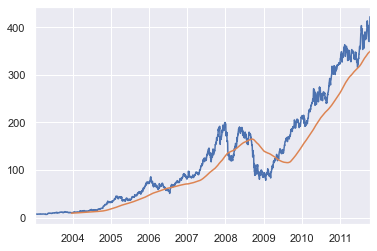

In [213]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [214]:
appl_std250 = close_px.AAPL.rolling(250,min_periods=10).std()


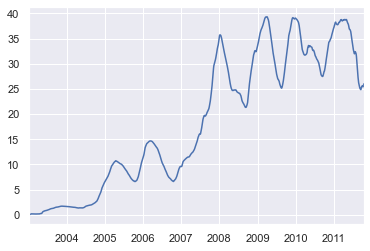

In [215]:
appl_std250.plot()

In [216]:
expanding_mean = appl_std250.expanding().mean()
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    18.521201
2011-10-11    18.524272
2011-10-12    18.527385
2011-10-13    18.530554
2011-10-14    18.533823
Freq: B, Name: AAPL, Length: 2292, dtype: float64

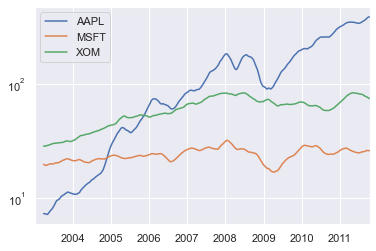

In [217]:
close_px.rolling(60).mean().plot(logy =True)

In [218]:
close_px.rolling('20D').mean()


,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


# Exponentially Weighted Functions

- McKinney, Wes. Python for Data Analysis (p. 538). O'Reilly Media. Kindle Edition. 

In [219]:

aapl_px = close_px.AAPL['2006':'2007']


In [220]:
ma60 = aapl_px.rolling( 30, min_periods = 20).mean()


In [221]:
ewma60 = aapl_px.ewm( span = 30).mean()

In [222]:
aapl_px

2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
               ...  
2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [223]:
ma60

2006-01-02           NaN
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06           NaN
                 ...    
2007-12-25    181.520333
2007-12-26    182.615000
2007-12-27    183.757333
2007-12-28    184.872000
2007-12-31    186.009667
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [224]:
ewma60

2006-01-02     71.890000
2006-01-03     73.367667
2006-01-04     73.937767
2006-01-05     74.059619
2006-01-06     74.569360
                 ...    
2007-12-25    184.441771
2007-12-26    185.377786
2007-12-27    186.228897
2007-12-28    187.106387
2007-12-31    187.814362
Freq: B, Name: AAPL, Length: 521, dtype: float64

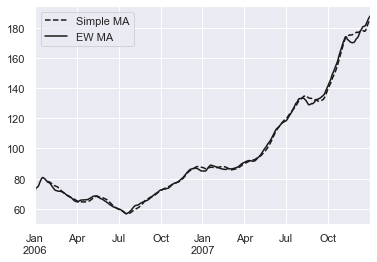

In [225]:
ma60.plot( style ='k--', label ='Simple MA')
ewma60.plot( style ='k-', label ='EW MA')
plt.legend()


In [226]:
spx_px = close_px_all['SPX']
spx_px

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

In [228]:
spx_rets = spx_px.pct_change()
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [229]:
returns = close_px.pct_change()
returns

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


In [230]:
corr = returns.AAPL.rolling(125, min_periods = 100).corr(spx_rets)
corr

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
                ...   
2011-10-10    0.736464
2011-10-11    0.729906
2011-10-12    0.728404
2011-10-13    0.727165
2011-10-14    0.729858
Length: 2292, dtype: float64

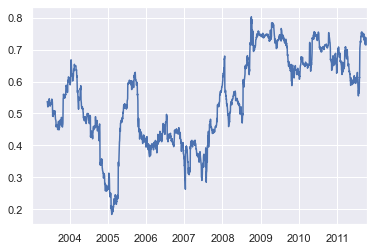

In [231]:
corr = returns.AAPL.rolling(125, min_periods = 100).corr( spx_rets)
corr.plot()

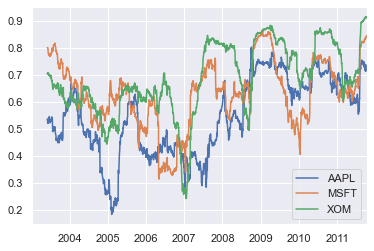

In [232]:
corr = returns.rolling( 125, min_periods = 100).corr(spx_rets)
corr.plot()



# User-Defined Moving Window Functions


In [233]:
from scipy.stats import percentileofscore



In [234]:
score_at_2percent = lambda x: percentileofscore( x, 0.02)

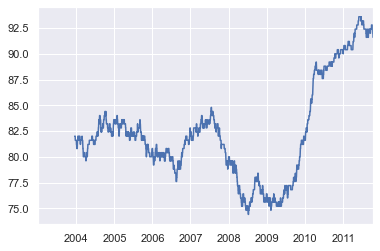

In [236]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()